# 第四次编程作业

Lane-Emden equation of index n: $\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2\frac{d\theta}{d\xi}\right)=-\theta^n$  
$\Rightarrow\frac{1}{\xi^2}\left(2\xi\frac{d\theta}{d\xi}+\xi^2\frac{d^2\theta}{d\xi^2}\right)=-\theta^n$  
$\Rightarrow\frac{d^2\theta}{d\xi^2}+\frac{2}{\xi}\frac{d\theta}{d\xi}=-\theta^n$

将二阶方程化为一阶方程组：  
$\begin{cases}\frac{d\theta}{d\xi}=\theta^{\prime}(\xi) \\
\frac{d\theta^{\prime}}{d\xi}=-\theta^n-\frac{2}{\xi}\theta^{\prime}=f\left(\xi,\theta,\theta^{\prime}\right) \\
\theta(\xi=0) = 1 \\
\theta^{\prime}(\xi=0)=\frac{d\theta}{d\xi}|_{\xi=0}=0\end{cases}$

预估-校正公式:  
$\begin{pmatrix} \bar{\theta}_{n+1}\\ \bar{\theta^{\prime}}_{n+1} \end{pmatrix}=\begin{pmatrix} \theta_{n}\\ \theta^{\prime}_{n}\end{pmatrix}+h\begin{pmatrix} \theta^{\prime}_{n} \\ f\left(\xi_{n},\theta_{n},\theta^{\prime}_{n}\right)\end{pmatrix}$  
$\begin{pmatrix} \theta_{n+1} \\ \theta^{\prime}_{n+1}\end{pmatrix}=\begin{pmatrix} \theta_{n} \\ \theta^{\prime}_{n}\end{pmatrix}+\frac{h}{2}\Biggl[\begin{pmatrix} \theta^{\prime}_{n} \\ f\left(\xi_{n},\theta_{n},\theta^{\prime}_{n}\right)\end{pmatrix}+\begin{pmatrix} \bar{\theta^{\prime}}_{n+1} \\ f\left(\xi_{n+1},\bar{\theta}_{n+1},\bar{\theta^{\prime}}_{n+1}\right) \end{pmatrix}\Biggr]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(n,xi,theta,thetapr):
    h = 1e-10
    if xi==0:#xi=0时会出现0/0
        val = -np.power(theta,n)-2./(xi+h)*thetapr
    else:
        val = -np.power(theta,n)-2./xi*thetapr
    return val

In [3]:
xi = np.array([0])
theta = np.array([1])
thetapr = np.array([0])
h = 0.01


$r=\alpha\xi, R = \alpha\xi_{1}\quad\Rightarrow \quad\frac{r}{R}=\frac{\xi}{\xi_{1}}$  
$\rho = \rho_{c}\theta^{n}\quad\Rightarrow\quad \frac{\rho}{\rho_{c}}=\theta^{n}$

In [4]:
n = 1.5
i = 0
while theta[i]>=0:
    xi = np.append(xi,xi[-1]+h)
    a = f(n,xi[i],theta[i],thetapr[i])
    #预估
    theta_bar = theta[i]+h*thetapr[i]
    thetapr_bar = thetapr[i]+h*a
    #校正
    theta_p = theta[i]+h/2.*(thetapr[i]+thetapr_bar)
    thetapr_p = thetapr[i]+h/2.*(a+f(n,xi[i+1],theta_bar,thetapr_bar))
    theta = np.append(theta,theta_p)
    thetapr = np.append(thetapr,thetapr_p)
    i = i + 1
x_1h = xi[:-1]/xi[-1]
y_1h_raw = theta[:-1]
y_1h = np.power(y_1h_raw,n)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


In [5]:
xi_1 = xi[-2]
thetapr_xi_1 =thetapr[-2] 
B = 1/(n+1)*np.power(xi_1,-4./3)*np.power(thetapr_xi_1,-2./3)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
xi = np.array([0])
theta = np.array([1])
thetapr = np.array([0])
n = 3
i = 0
while theta[i]>=0:
    xi = np.append(xi,xi[-1]+h)
    a = f(n,xi[i],theta[i],thetapr[i])
    #预估
    theta_bar = theta[i]+h*thetapr[i]
    thetapr_bar = thetapr[i]+h*a
    #校正
    theta_p = theta[i]+h/2.*(thetapr[i]+thetapr_bar)
    thetapr_p = thetapr[i]+h/2.*(a+f(n,xi[i+1],theta_bar,thetapr_bar))
    theta = np.append(theta,theta_p)
    thetapr = np.append(thetapr,thetapr_p)
    i = i + 1
x_3 = xi[:-1]/xi[-1]
y_3_raw = theta[:-1]
y_3 = np.power(y_3_raw,n)


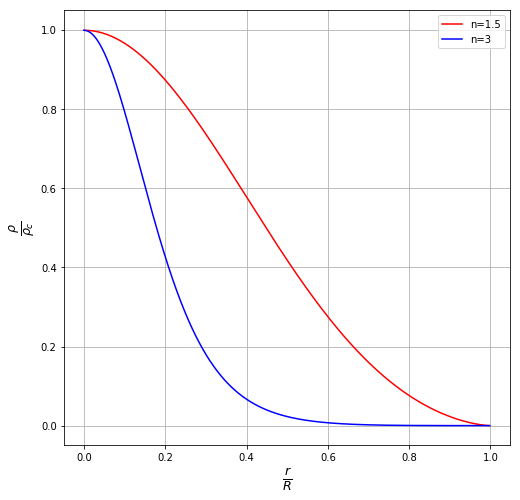

In [7]:
plt.figure(figsize=(8,8))
plt.plot(x_1h, y_1h, color='r', label='n=1.5')
plt.plot(x_3, y_3, color='b', label='n=3')
plt.xlabel(r'$\frac{r}{R}$', fontsize=18)
plt.ylabel(r'$\frac{\rho}{\rho_{c}}$',fontsize=18)
plt.legend()
plt.grid()
plt.show()

发现上图和课本图5.1并不一样，感觉似乎课本上的纵坐标是$\theta$，忘记了计算n次方，尝试后果然感觉很可能是这样

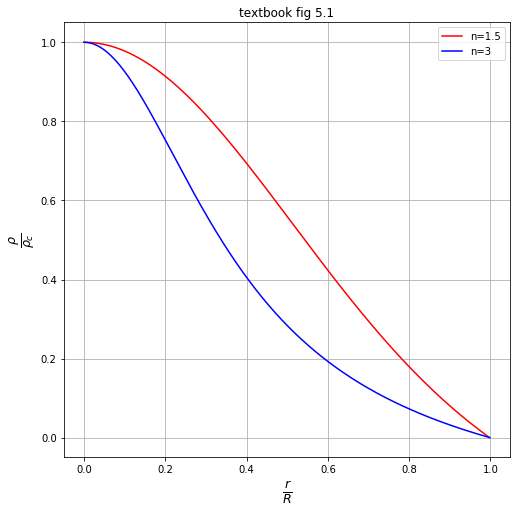

In [8]:
plt.figure(figsize=(8,8))
plt.plot(x_1h, y_1h_raw, color='r', label='n=1.5')
plt.plot(x_3, y_3_raw, color='b', label='n=3')
plt.xlabel(r'$\frac{r}{R}$', fontsize=18)
plt.ylabel(r'$\frac{\rho}{\rho_{c}}$',fontsize=18)
plt.legend()
plt.grid()
plt.title('textbook fig 5.1')
plt.show()

$\begin{cases}P_{c}=\frac{(4\pi G)^{\frac{1}{n}}}{n+1}\left(\frac{GM}{M_{n}}\right)^{\frac{n-1}{n}}\left(\frac{R}{R_{n}}\right)^{\frac{3-n}{n}}\rho_{c}^{\frac{n+1}{n}}\\  
\rho_{c}=D_{n}\frac{M}{\frac{4\pi}{3}R^{3}}\end{cases}$  
$\Rightarrow P_{c}=(4\pi)^{\frac{1}{3}}GM^{\frac{2}{3}}\rho_{c}^{\frac{4}{3}}\frac{1}{n+1}\left(M_{n}\right)^{\frac{1-n}{n}}\left(R_{n}\right)^{\frac{n-3}{n}}\left(3D_{n}\right)^{\frac{3-n}{3n}}$  
再将$D_{n},M_{n},R_{n}$表达式带入可得$B_{n}$:  
$\begin{align*}B_{n}&=-\frac{1}{n+1}\left[\xi_{1}^2\left(\frac{d\theta}{d\xi}_{\xi_{1}}\right)\right]^{\frac{1-n}{n}}\xi_{1}^{\frac{n-3}{n}}\left[\frac{1}{\xi_{1}}\left(\frac{d\theta}{d\xi}\right)_{\xi_{1}}\right]^{\frac{n-3}{3n}}\\
&=-\frac{1}{n+1}\xi_{1}^{-\frac{4}{3}}\left(\frac{d\theta}{d\xi}\right)^{-\frac{2}{3}}_{\xi_{1}}\end{align*}$

$\begin{cases}
D_{n}=-\left[\frac{3}{\xi_{1}}\left(\frac{d\theta}{d\xi}\right)_{\xi_{1}}\right]^{-1}\\
M_{n}=-\xi_{1}^2\left(\frac{d\theta}{d\xi}\right)_{\xi_{1}}\\
R_{n}=\xi_{1}\\
B_{n}=-\frac{1}{n+1}\xi_{1}^{-\frac{4}{3}}\left(\frac{d\theta}{d\xi}\right)^{-\frac{2}{3}}_{\xi_{1}}\end{cases}$

In [9]:
n_set = np.array([1.0,1.5,2.0,2.5,3.0,3.5])
D_n = np.zeros(6)
M_n = np.zeros(6)
R_n = np.zeros(6)
B_n = np.zeros(6)

In [10]:
j = 0
for n in n_set:
    xi = np.array([0])
    theta = np.array([1])
    thetapr = np.array([0])
    i = 0
    while theta[i]>=0:
        xi = np.append(xi,xi[-1]+h)
        a = f(n,xi[i],theta[i],thetapr[i])
        #预估
        theta_bar = theta[i]+h*thetapr[i]
        thetapr_bar = thetapr[i]+h*a
        #校正
        theta_p = theta[i]+h/2.*(thetapr[i]+thetapr_bar)
        thetapr_p = thetapr[i]+h/2.*(a+f(n,xi[i+1],theta_bar,thetapr_bar))
        theta = np.append(theta,theta_p)
        thetapr = np.append(thetapr,thetapr_p)
        i = i + 1
    xi_1 = xi[-2]
    thetapr_xi_1 = -thetapr[-2] #单调减函数，一阶导恒小于0
    D_n[j] = xi_1/3/thetapr_xi_1
    M_n[j] = (xi_1**2)*thetapr_xi_1
    R_n[j] = xi_1
    B_n[j] = 1/(n+1)*np.power(xi_1,-4./3)*np.power(thetapr_xi_1,-2./3)
    j = j+1
    

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


In [11]:
i = 0
for n in n_set:
    print('D_{}={}\t'.format(n,D_n[i]))
    print('M_{}={}\t'.format(n,M_n[i]))
    print('R_{}={}\t'.format(n,R_n[i]))
    print('B_{}={}\n'.format(n,B_n[i]))
    i = i+1

D_1.0=3.28494008717697	
M_1.0=3.1415229479984386	
R_1.0=3.139999999999977	
B_1.0=0.23310048654956714

D_1.5=5.972312774083133	
M_1.5=2.7140309424190567	
R_1.5=3.649999999999966	
B_1.5=0.20558123066016748

D_2.0=11.380016362048105	
M_2.0=2.4110356371281205	
R_2.0=4.349999999999952	
B_2.0=0.18538574027587443

D_2.5=23.337364704926504	
M_2.5=2.1871988966498903	
R_2.5=5.34999999999993	
B_2.5=0.16956638840343055

D_3.0=54.02103865671657	
M_3.0=2.0182431211567633	
R_3.0=6.8899999999998975	
B_3.0=0.15653964864760037

D_3.5=152.60350061254525	
M_3.5=1.890570822481739	
R_3.5=9.529999999999841	
B_3.5=0.1453423525481875



|n|$D_{n}$|$M_{n}$|$R_{n}$|$B_{n}$|
|:--:|:--:|:--:|:--:|:--:|
|1.0|3.285|3.14|3.14|0.233|
|1.5|5.972|2.71|3.65|0.206|
|2.0|11.38|2.41|4.35|0.185|
|2.5|23.34|2.19|5.35|0.170|
|3.0|54.02|2.02|6.89|0.157|
|3.5|152.6|1.89|9.53|0.15|